# 項目：使用邏輯迴歸預測泰坦尼克號倖存情況

## 分析目標

基於泰坦尼克號乘客的性別和船艙等級等屬性，對倖存情況進行邏輯回歸分析，從而能利用得到的模型，對未知倖存情況的乘客，根據屬性預測是否從沉船事件中倖存。

## 簡介

> 泰坦尼克號（英語：RMS Titanic）是一艘奧林匹克級郵輪，於1912年4月首航時撞上冰山後沉沒。泰坦尼克號是同級的3艘超級郵輪中的第2艘，與姊妹船奧林匹克號和不列顛號為白星航運公司的乘客們提供大西洋旅行。

> 泰坦尼克號由位於北愛爾蘭貝爾法斯特的哈蘭·沃爾夫船廠興建，是當時最大的客運輪船，由於其規模相當一艘現代航空母艦，因而號稱“上帝也沉沒不了的巨型郵輪”。在泰坦尼克號的首航中，從英國南安普敦出發，途經法國瑟堡-奧克特維爾以及愛爾蘭昆士蘭敦，計劃橫渡大西洋前往美國紐約市。但因為人為錯誤，於1912年4月14日船上時間夜裡11點40分撞上冰山；2小時40分鐘後，即4月15日凌晨02點20分，船裂成兩半後沉入大西洋，死亡人數超越1500人，堪稱20世紀最大的海難事件，同時也是最廣為人知的海難之一。

資料集包括兩個資料表：`titianic_train.csv`和`titanic_test.csv`。

`titianic_train.csv`記錄了超過八百位泰坦尼克號乘客在沉船事件後的倖存情況，以及乘客的相關信息，包括所在船艙等級、性別、年齡、同乘伴侶/同胞數量、同乘父母/孩子數量，等等。

`titanic_test.csv`只包含乘客（這些乘客不在`titianic_train.csv`裡）相關信息，此文件可以被用於預測乘客是否倖存。

`titianic_train.csv`每列的意思如下：
- PassengerId：乘客ID
- survival：是否倖存
     - 0 否
     - 1 是
- pclass：船艙等級
     - 1 一等艙
     - 2 二等艙
     - 3 三等艙
- sex：性別
- Age：年齡
- sibsp：同乘伴侶/同胞數
- parch：同乘父母/孩子數量
- ticket：船票號
- fare：票價金額
- cabin：船艙號
- embarked：登船港口
     - C 瑟堡
     - Q 皇后鎮
     - S 南安普敦

`titianic_test.csv`每列的意義和上方相同，但不具備survival變數的數據，即是否倖存。

## 讀取數據

導入資料分析所需的函式庫。

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

我們計畫先利用`titanic_train.csv`訓練預測模型，因此讀取資料方面，目前只需要匯入`titanic_train.csv`。

透過Pandas的`read_csv`函數，將原始資料檔`titanic_train.csv`裡的資料內容，解析為DataFrame並賦值給變數`original_titanic_train`。

In [44]:
original_titanic_train = pd.read_csv("titanic_train.csv")
original_titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 評估和清洗數據

在這一部分中，我們將對上一部分建立的`original_titanic_train`DataFrame所包含的資料進行評估和清理。

主要從兩個方面進行：結構和內容，即整齊度和乾淨度。

資料的結構性問題指不符合「每個變數為一列，每個觀察值為一行，每種類型的觀察單位為一個表格」這三個標準；資料的內容性問題包括存在遺失資料、重複資料、無效資料等。

為了區分開經過清理的資料和原始的數據，我們建立新的變數`cleaned_titanic_train`，讓它為`original_titanic_train`複製出的副本。我們之後的清理步驟都會被運用在`cleaned_titanic_train`上。

In [45]:
cleaned_titanic_train = original_titanic_train.copy()

### 數據整齊度

In [46]:
cleaned_titanic_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


從頭部的10行資料來看，資料符合“每個變數為一行，每個觀察值為一列，每種類型的觀察單位為一個表格”，因此不存在結構性問題。

### 數據乾淨度

接下來透過`info`，對數據內容進行大致了解。

In [47]:
cleaned_titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


從輸出結果來看，`cleaned_titanic_train`共有891個觀察值，其中`Age`、`Cabin`和`Embarked`存在缺失值，將在後續進行評估和清理。

資料類型方面，`PassengerId`表示乘客ID，資料類型不應為數字，應為字串，所以需要進行資料格式轉換。

並且，我們已知`Survived`（是否倖存）、`Pclass`（船艙等級）、`Sex`（性別）、`Embarked`（登船港口）都是分類數據，可以把數據類型都轉換為Category。

In [48]:
cleaned_titanic_train["PassengerId"] = cleaned_titanic_train["PassengerId"].astype("str")

In [49]:
cleaned_titanic_train["Survived"] = cleaned_titanic_train["Survived"].astype("category")
cleaned_titanic_train["Pclass"] = cleaned_titanic_train["Pclass"].astype("category")
cleaned_titanic_train["Sex"] = cleaned_titanic_train["Sex"].astype("category")
cleaned_titanic_train["Embarked"] = cleaned_titanic_train["Embarked"].astype("category")

In [50]:
cleaned_titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    object  
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    category
dtypes: category(4), float64(2), int64(2), object(4)
memory usage: 59.8+ KB


#### 處理缺失數據

從`info`方法的輸出結果來看，在`cleaned_titanic_train`中，`Age`、`Cabin`和`Embarked`變數存在缺失值。

In [51]:
cleaned_titanic_train[cleaned_titanic_train["Age"].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


有177個觀察值的年齡變數缺失，佔總體資料比例20%左右。由於這些觀察值數量較多，且的其它變數仍能為分析提供價值，我們最好保留這些行。

但由於我們後面需要用到的邏輯迴歸函數`Logit`不允許資料中包含缺失值，所以用乘客年齡平均值來填滿缺失值。

In [52]:
average_age = cleaned_titanic_train["Age"].mean()
cleaned_titanic_train["Age"] = cleaned_titanic_train["Age"].fillna(average_age)
cleaned_titanic_train["Age"].isna().sum()

np.int64(0)

In [53]:
cleaned_titanic_train[cleaned_titanic_train["Cabin"].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.000000,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.000000,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S


有687個觀察值的船艙號變數缺失，說明船艙號資料在大部分觀察值中都是未知的，所以不能刪除這些觀察值。

此外，我們認為船艙號並不是影響生還機率的關鍵因素，不會被納入邏輯迴歸的自變數內，即使缺失也不會影響建立模型，因此可以保留這些觀察值。

In [54]:
cleaned_titanic_train[cleaned_titanic_train["Embarked"].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


僅有兩個觀察值的登船港口變數缺失，但我們認為登船港口並不是影響生還機率的關鍵因素，不會被納入邏輯迴歸的自變數內，即使缺失也不會影響建立模型，因此可以保留這些觀察值。

#### 處理重複數據

根據資料變數的含義以及內容來看，`PassengerId`是乘客的唯一識別符，不應該存在重複，因此查看是否存在重複值。

In [55]:
cleaned_titanic_train["PassengerId"].duplicated().sum()

np.int64(0)

輸出結果為0，表示不存在重複值。

#### 處理不一致數據

不一致資料可能存在於所有分類變數中，我們要查看是否存在不同值實際指涉相同目標的情況。

In [56]:
cleaned_titanic_train["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [57]:
cleaned_titanic_train["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [58]:
cleaned_titanic_train["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [59]:
cleaned_titanic_train["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

從以上輸出結果來看，均不存在不一致數據。

#### 處理無效或錯誤數據

可以透過DataFrame的`describe`方法，對數值統計資訊進行快速了解。

In [60]:
cleaned_titanic_train.describe()

,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,13.002015,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.910400
50%,29.699118,0.000000,0.000000,14.454200
75%,35.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


乘客年齡平均為30歲左右，最大值為80歲，最小值為0.42歲。同乘伴侶/同胞數量最大值為8個，最小為0個。同乘父母/孩子數量最大值為6個，最小值為0個。船票價格平均為32元，最大值為512元，最小值為0元，猜測0元表示增票。數據不存在脫離現實的數值。

## 整理數據

資料的整理，與分析方向緊密相關。此數據分析目標是，根據泰坦尼克號乘客的相關信息，預測沉船事件發生後的生還機率。

資料變數包含乘客同乘伴侶/同胞數量，以及同乘父母/孩子數量，這些可以幫助計算出船上家庭成員的數量。我們對同乘家庭成員數量是否會顯著影響倖存感興趣，因此可以創建一個新的變量，記錄此數值。

In [61]:
cleaned_titanic_train["FamilyNum"] = cleaned_titanic_train["SibSp"] + cleaned_titanic_train["Parch"]
cleaned_titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyNum
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


## 探索數據

在著手邏輯迴歸分析之前，我們可以先藉助資料視覺化，探索數值變數的分佈，以及與乘客是否倖存有相關性的變量，為後續的進一步分析提供方向。

In [62]:
# 設定圖表色盤為"pastel"
sns.set_palette("pastel")

In [63]:
# 設定圖表尺寸
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

### 倖存比例

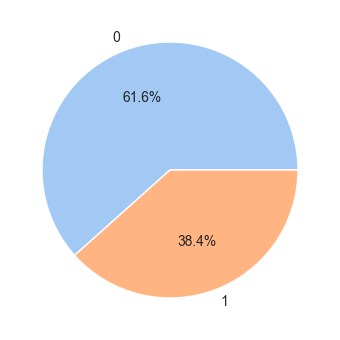

In [64]:
survived_count = cleaned_titanic_train["Survived"].value_counts()
survived_label = survived_count.index
plt.pie(survived_count, labels=survived_label, autopct="%.1f%%")
plt.show()

從以上圓餅圖來看，鐵達尼號罹難乘客多於倖存乘客，比例約3:2。

### 乘客年齡

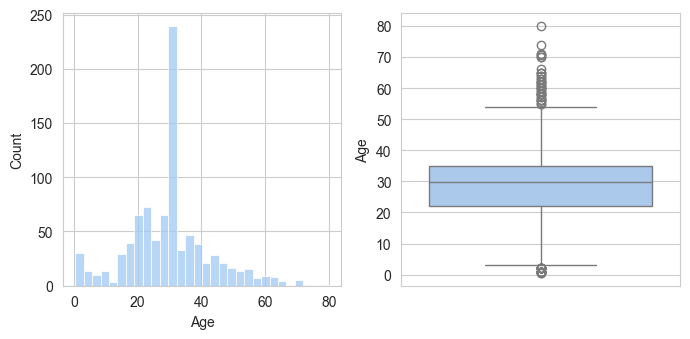

In [65]:
figure, axes = plt.subplots(1, 2)
sns.histplot(cleaned_titanic_train, x="Age", ax=axes[0])
sns.boxplot(cleaned_titanic_train, y="Age", ax=axes[1])
plt.show()

大多數乘客年齡位於20歲到40歲之間，但有不少老年乘客以及嬰兒。

### 乘客年齡與是否倖存

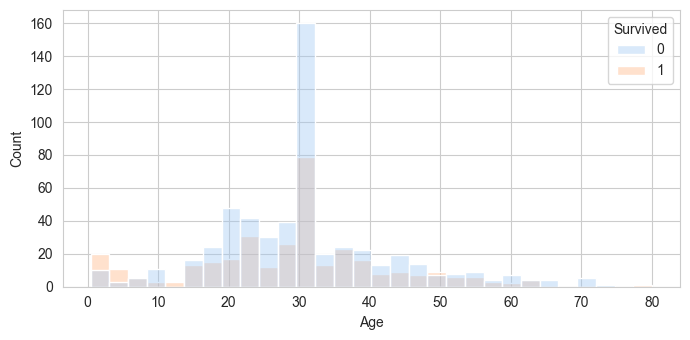

In [66]:
sns.histplot(cleaned_titanic_train, x="Age", hue="Survived", alpha=0.4)
plt.show()

從乘客年齡直方圖來看，只有嬰兒群倖存比例較高，絕大部分其餘年齡層都是罹難人數多於倖存人數。

### 船票金額分佈

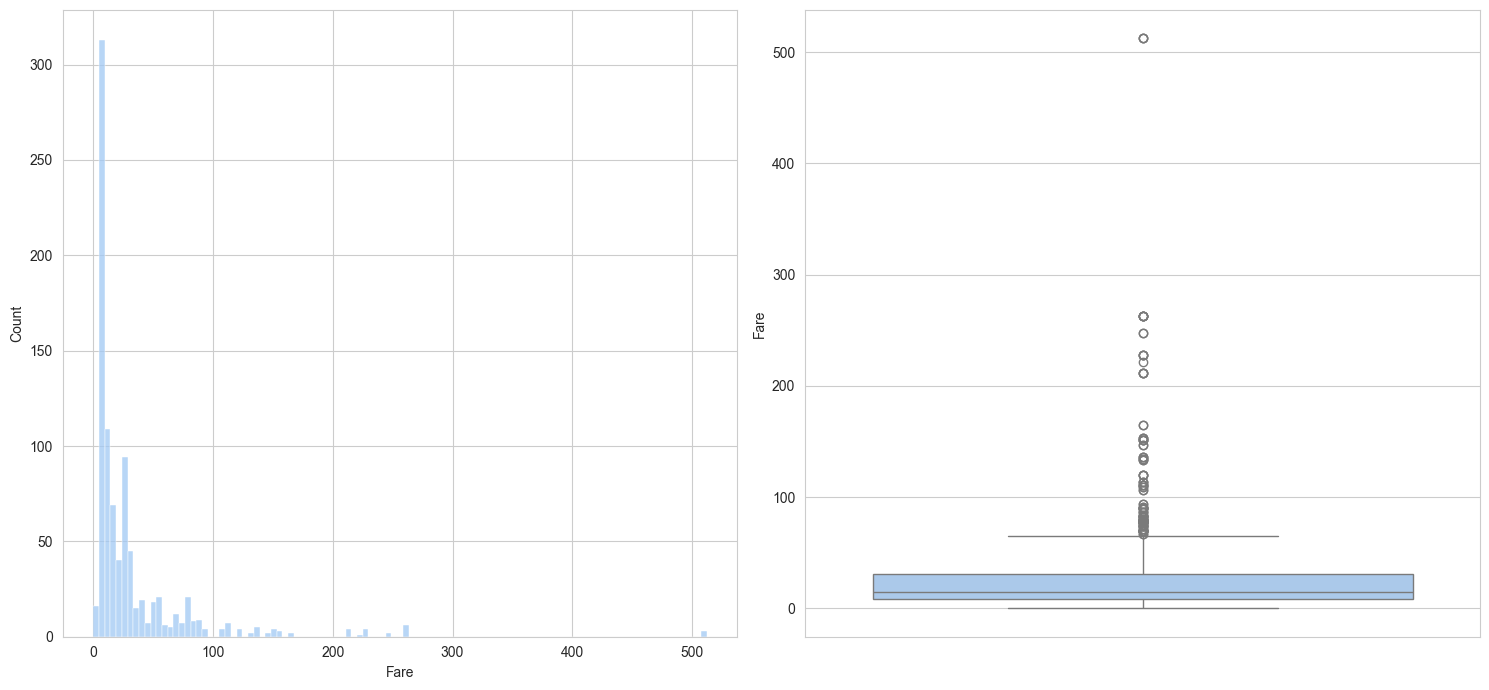

In [67]:
figure, axes = plt.subplots(1, 2, figsize=[15, 7])
sns.histplot(cleaned_titanic_train, x="Fare", ax=axes[0])
sns.boxplot(cleaned_titanic_train, y="Fare", ax=axes[1])
plt.show()

船票金額呈現右偏態分佈，顯示資料集中的大多數船票價格中等，但有一些票價很高的極端值，使得平均值被拉高。

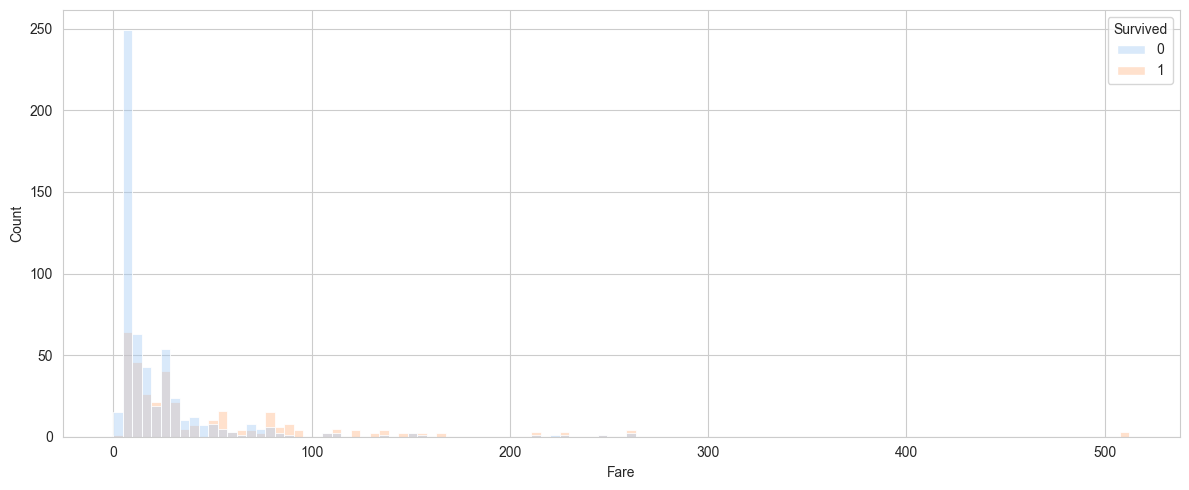

In [68]:
plt.subplots(1, 1, figsize=[12, 5])
sns.histplot(cleaned_titanic_train, x="Fare", hue="Survived", alpha=0.4)
plt.show()

### 船艙等級與是否倖存的關係

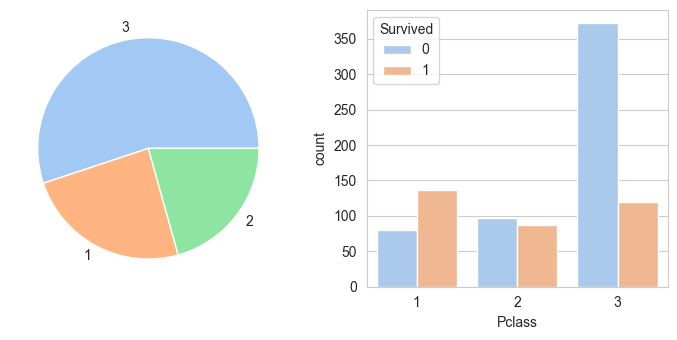

In [69]:
figure, axes = plt.subplots(1, 2)
pclass_count = cleaned_titanic_train["Pclass"].value_counts()
pclass_label = pclass_count.index
axes[0].pie(pclass_count, labels=pclass_label)
sns.countplot(cleaned_titanic_train, x="Pclass", hue="Survived", ax=axes[1])
plt.show()

從是否倖存與船艙等級之間的長條圖來看，船艙等級低的乘客中遇難比例更大，船艙等級高的乘客中倖存比例更大。

### 性別與是否倖存的關係

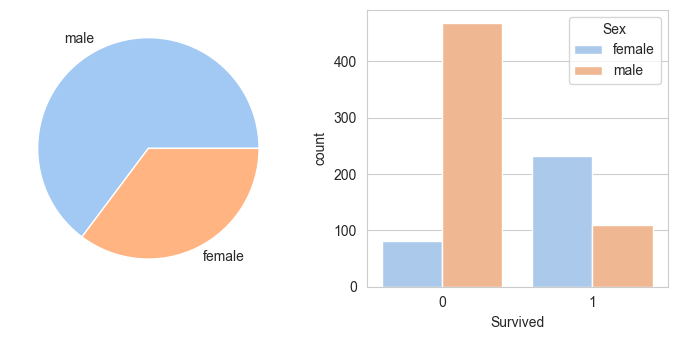

In [70]:
figure, axes = plt.subplots(1, 2)
sex_count = cleaned_titanic_train["Sex"].value_counts()
sex_label = sex_count.index
axes[0].pie(sex_count, labels=sex_label)
sns.countplot(cleaned_titanic_train, x="Survived", hue="Sex", ax=axes[1])
plt.show()

從是否倖存與性別之間的長條圖來看，男性乘客中遇難比例更大，女性乘客中倖存比例更大。

### 登船港口與是否倖存的關係

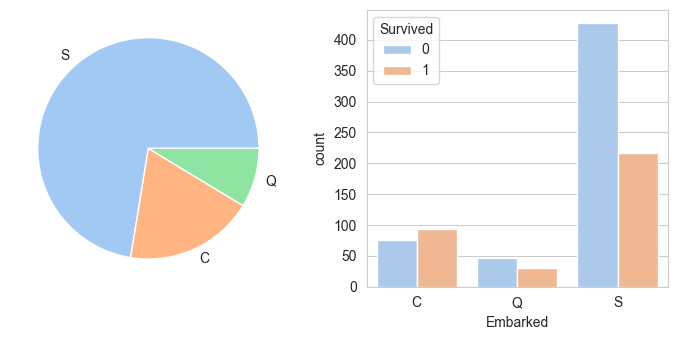

In [71]:
figure, axes = plt.subplots(1, 2)
embarked_count = cleaned_titanic_train["Embarked"].value_counts()
embarked_label = embarked_count.index
axes[0].pie(embarked_count, labels=embarked_label)
sns.countplot(cleaned_titanic_train, x="Embarked", hue="Survived", ax=axes[1])
plt.show()

從是否倖存與登船港之間的長條圖來看，瑟堡登船的乘客，倖存數量大於遇難數量，而皇后鎮和南安普敦則相反。

### 家庭成員數量與是否倖存的關係

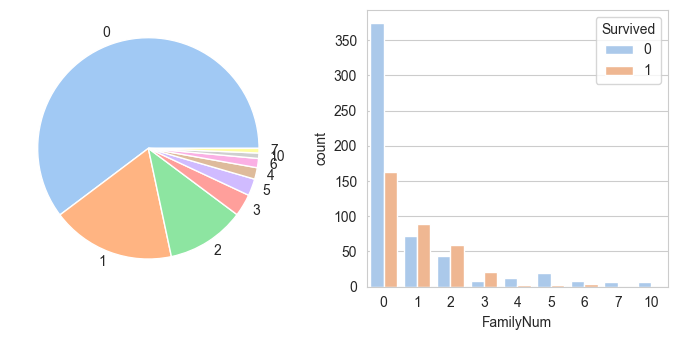

In [72]:
figure, axes = plt.subplots(1, 2)
familyNum_count = cleaned_titanic_train["FamilyNum"].value_counts()
familyNum_label = familyNum_count.index
axes[0].pie(familyNum_count, labels=familyNum_label)
sns.countplot(cleaned_titanic_train, x="FamilyNum", hue="Survived", ax=axes[1])
plt.show()

從是否倖存與乘客家庭成員之間的長條圖來看，獨身的乘客中遇難的多於倖存的。從有攜帶家庭成員的乘客來看，家庭成員在1～3位之間的倖存人數超過遇難人數，但同乘家庭成員超過3位後，遇難的更多。

In [73]:
cleaned_titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    object  
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    category
 12  FamilyNum    891 non-null    int64   
dtypes: category(4), float64(2), int64(3), object(4)
memory usage: 66.8+ KB


## 分析數據

在分析步驟中，我們將利用以上清理後到的數據，進行邏輯迴歸分析，目標是得到一個可以根據泰坦尼克號乘客各個屬性，對沉船事件後倖存情況進行預測的數學模型。

我們先引入做邏輯迴歸所需的模組。

In [74]:
import statsmodels.api as sm

然後可以建立一個新的DataFrame`lr_titanic_train`，讓它作為我們進邏輯性迴歸分析所使用的資料。

和`cleaned_titanic_train`區分開的原因是，我們在進行迴歸分析之前，還可能需要對資料進行一些準備，例如引入虛擬變量，這些都可以在`lr_titanic_train`上執行。

In [75]:
lr_titanic_train = cleaned_titanic_train.copy()
lr_titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyNum
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [76]:
lr_titanic_train = lr_titanic_train.drop(["PassengerId", "Name", "Ticket", "Cabin", "Embarked"], axis=1)
lr_titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilyNum
0,0,3,male,22.0,1,0,7.2500,1
1,1,1,female,38.0,1,0,71.2833,1
2,1,3,female,26.0,0,0,7.9250,0
3,1,1,female,35.0,1,0,53.1000,1
4,0,3,male,35.0,0,0,8.0500,0


資料裡還存在分類變量，無法直接建立邏輯迴歸模型。我們需要引入虛擬變量，也就是用0和1分別表示是否屬於該類別。

In [77]:
lr_titanic_train = pd.get_dummies(lr_titanic_train, drop_first=True, columns=["Pclass", "Sex"], dtype="int")
lr_titanic_train.head()

,Survived,Age,SibSp,Parch,Fare,FamilyNum,Pclass_2,Pclass_3,Sex_male
0,0,22.0,1,0,7.2500,1,0,1,1
1,1,38.0,1,0,71.2833,1,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0
3,1,35.0,1,0,53.1000,1,0,0,0
4,0,35.0,0,0,8.0500,0,0,1,1


接下來，我們要把因變數和自變數劃分出來。

因變數是`Survived`變量，因為我們進行邏輯回歸的目的，是根據其它可能對乘客生還機率有影響的變量，來預測倖存情況。

In [78]:
y = lr_titanic_train["Survived"]

我們可以把`Survived`之外的先納入自變量，但需要查看它們之間的相關性。如果其中有些變數之間相關性很高，會導致共線性。

In [79]:
X = lr_titanic_train.drop(["Survived"], axis=1)
X.corr()

,Age,SibSp,Parch,Fare,FamilyNum,Pclass_2,Pclass_3,Sex_male
Age,1.000000,-0.232625,-0.179191,0.091566,-0.248512,0.006589,-0.281004,0.084153
SibSp,-0.232625,1.000000,0.414838,0.159651,0.890712,-0.055932,0.092548,-0.114631
Parch,-0.179191,0.414838,1.000000,0.216225,0.783111,-0.000734,0.015790,-0.245489
Fare,0.091566,0.159651,0.216225,1.000000,0.217138,-0.118557,-0.413333,-0.182333
FamilyNum,-0.248512,0.890712,0.783111,0.217138,1.000000,-0.038594,0.071142,-0.200988
Pclass_2,0.006589,-0.055932,-0.000734,-0.118557,-0.038594,1.000000,-0.565210,-0.064746
Pclass_3,-0.281004,0.092548,0.015790,-0.413333,0.071142,-0.565210,1.000000,0.137143
Sex_male,0.084153,-0.114631,-0.245489,-0.182333,-0.200988,-0.064746,0.137143,1.000000


一般我們認為，當相關係數的絕對值大於0.8的時候，可能會導致嚴重共線性，所以我們檢查的時候，找絕對值大於0.8的值即可。

In [80]:
X.corr().abs() > 0.8

,Age,SibSp,Parch,Fare,FamilyNum,Pclass_2,Pclass_3,Sex_male
Age,True,False,False,False,False,False,False,False
SibSp,False,True,False,False,True,False,False,False
Parch,False,False,True,False,False,False,False,False
Fare,False,False,False,True,False,False,False,False
FamilyNum,False,True,False,False,True,False,False,False
Pclass_2,False,False,False,False,False,True,False,False
Pclass_3,False,False,False,False,False,False,True,False
Sex_male,False,False,False,False,False,False,False,True


從上述輸出來看，`SibSp`和`FamilyNum`之間的相關係數絕對值大於0.8。這符合預期，因為`FamilyNum`是根據`SibSp`和`Parch`計算出來的。

不同變數之間的如果相關性過高，會導致數值最佳化演算法無法收斂，無法獲得邏輯迴歸模型參數的計算結果，因此我們需要移除`FamilyNum`或`SibSp`。我們對同乘家庭成員是否會影響倖存機率感興趣，所以保留`FamilyNum`。

此外，如果仔細看相關係數數值，會發現`Parch`和`FamilyNum`之間也存在強相關，相關係數為0.78，接近0.8，因此我們也對`Parch`進行移除，避免演算法無法收斂。

In [81]:
X = X.drop(["Parch", "SibSp"], axis=1)

接下來，為模型的線性方程式加上截距。

In [83]:
X = sm.add_constant(X)

下一步就可以呼叫`Logit`函數，利用最大似然最佳化來得到邏輯迴歸模型的參數值，並輸出總結資訊。

In [86]:
model = sm.Logit(y, X).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.443547
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      884
Method:                           MLE   Df Model:                            6
Date:                Sat, 14 Sep 2024   Pseudo R-squ.:                  0.3339
Time:                        16:22:14   Log-Likelihood:                -395.20
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 1.786e-82
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8097      0.445      8.568      0.000       2.938       4.681
Age           -0.0388      0.008     -4.963      0.000      -0.054      -0.023
Fare           0.0032      0.002      1.311      0.190      -0.002       0.008
FamilyNum     -0.2430      0.068     -3.594      0.000      -0.376      -0.110
Pclass_2      -1.0003      0.293     -3.416      0.001      -1.574      -0.426
Pclass_3      -2.1324      0.289     -7.373      0.000      -2.699      -1.566
Sex_male      -2.7759      0.199    -13.980      0.000      -3.165      -2.387
==============================================================================
"""

當我們把顯著區間設定為0.05時，以上結果的P值可以看出，模型認為船票價格對乘客存活機率沒有顯著性影響。因此可以把這個變數移除後，再次建立邏輯迴歸模型。

In [87]:
X = X.drop(["Fare"], axis=1)
model = sm.Logit(y, X).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.444623
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      885
Method:                           MLE   Df Model:                            5
Date:                Sat, 14 Sep 2024   Pseudo R-squ.:                  0.3323
Time:                        16:23:12   Log-Likelihood:                -396.16
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 4.927e-83
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0620      0.404     10.049      0.000       3.270       4.854
Age           -0.0395      0.008     -5.065      0.000      -0.055      -0.024
FamilyNum     -0.2186      0.065     -3.383      0.001      -0.345      -0.092
Pclass_2      -1.1798      0.261     -4.518      0.000      -1.692      -0.668
Pclass_3      -2.3458      0.242     -9.676      0.000      -2.821      -1.871
Sex_male      -2.7854      0.198    -14.069      0.000      -3.173      -2.397
==============================================================================
"""

邏輯迴歸模型預測以下因素的增加（或存在）會降低倖存機率：年齡、同乘家庭成員數、不在一等艙、性別為男性。

要理解各個各個自變數係數的實際意義，我們需要計算自然常數的次方。

In [94]:
# Age
np.exp(-0.0395)

np.float64(0.9612699539905982)

以上結果說明，年齡每增加1歲，生還機率降低4%左右。

In [95]:
# FamilyNum
np.exp(-0.2186)

np.float64(0.803643111115195)

以上結果說明，每多一位同乘家庭成員，生還機率降低20%左右。

In [96]:
# Pclass_2
np.exp(-1.1798)

np.float64(0.30734020049483596)

以上結果說明，二等艙乘客的生還機率比一等艙乘客低71%左右。

In [97]:
# Pclass_3
np.exp(-2.3458)

np.float64(0.09577055503172162)

以上結果說明，三等艙乘客的生還機率比一等艙乘客低90%左右。

In [98]:
# Sex_male
np.exp(-2.7854)

np.float64(0.061704402333015156)

以上結果說明，男性乘客的生還機率比女性乘客低約94%。

根據模型參數值，我們總結：
- 年齡小的乘客倖存機率較高；
- 女性乘客的生還率比男性乘客的倖存機率更高；
- 來自的船艙等級高的乘客倖存機率較高；
- 同乘家庭成員少的乘客倖存機率較高。

前兩條背後的原因可能與泰坦尼克號沉船後逃生時，「讓孩子和女性先走」的原則。第三條說明可能當時艙位較尊貴的乘客擁有了優先逃生的機會。第四條可能是因為擁有較大數量家庭成員的乘客在災難發生時會急於解救其他家庭成員而非選擇逃生，最後也失去了自己逃生的機會。

得到模型後，我們將用於預測`titianic_test.csv`裡泰坦尼克號乘客的生還情況。

首先讀取`titianic_test.csv`的資料。

In [99]:
titanic_test = pd.read_csv("titanic_test.csv")
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


由於邏輯迴歸模型不允許資料中有缺失值，因此我們需要檢查`titanic_test`是否存在資料缺失。

In [100]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


從上述輸出可見，`Age`、`Fare`、`Cabin`存在缺失值。其中`Fare`和`Cabin`不屬於迴歸模型的自變量，即使缺失也不會影響預測，因此可以忽略；`Age`需要我們進行和針對`cleaned_titanic_train`同樣的操作，即用平均值填充。

In [101]:
titanic_test["Age"] = titanic_test["Age"].fillna(titanic_test["Age"].mean())
titanic_test["Age"].isna().sum()

np.int64(0)

下一步是將模型中的分類變數引入虛擬變量，但在引入前我們需要先把分類變數的類型轉換為Category，並且透過`categories`參數，讓程式知道所有可能的分類值。這樣做的原因是，預測資料包含的分類可能不全。我們需要確保引入虛擬變數的時候，不會漏掉某個或某些分類。

In [102]:
titanic_test["Pclass"] = pd.Categorical(titanic_test["Pclass"], categories=["1", "2", "3"])
titanic_test["Sex"] = pd.Categorical(titanic_test["Sex"], categories=["female", "male"])
titanic_test["Embarked"] = pd.Categorical(titanic_test["Embarked"], categories=["C", "Q", "S"])

下一步，將模型用到的分類變數引入虛擬變數。

In [103]:
titanic_test = pd.get_dummies(titanic_test, drop_first=True, columns=["Pclass", "Sex"], dtype=int)
titanic_test.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_2,Pclass_3,Sex_male
0,892,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,Q,0,0,1
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,S,0,0,0
2,894,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,Q,0,0,1
3,895,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,S,0,0,1
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,S,0,0,0


查看模型需要的輸入變數。

In [104]:
model.params

const        4.061982
Age         -0.039495
FamilyNum   -0.218627
Pclass_2    -1.179763
Pclass_3    -2.345823
Sex_male    -2.785398
dtype: float64

由於我們在資料整理步驟建立了`FamilyNum`變量，此處也需要對預測資料加上此變數。

In [105]:
titanic_test["FamilyNum"] = titanic_test["SibSp"] + titanic_test["Parch"]
titanic_test.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_2,Pclass_3,Sex_male,FamilyNum
0,892,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,Q,0,0,1,0
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,S,0,0,0,1
2,894,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,Q,0,0,1,0
3,895,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,S,0,0,1,0
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,S,0,0,0,2


接下來建立我們要輸入給模型進行預測的變量，需要和模型訓練時的輸入一致。

In [107]:
X_test = titanic_test[["Age", "FamilyNum", "Pclass_2", "Pclass_3", "Sex_male"]]
X_test = sm.add_constant(X_test)

現在就可以呼叫邏輯迴歸模型的`predict`方法，得到預測的存活機率。

In [108]:
predicted_value = model.predict(X_test)
predicted_value

0      0.478514
1      0.879434
2      0.236473
3      0.552361
4      0.940242
         ...   
413    0.520230
414    0.925647
415    0.439306
416    0.520230
417    0.411858
Length: 418, dtype: float64

我們獲得了邏輯迴歸模型預測的`titanic_test.csv`裡，泰坦尼克號乘客的倖存機率。我們可以把機率大於等於0.5的預測為倖存，小於0.5的預測為遇難，輸出一下這個最終的預測結果。

In [109]:
predicted_value > 0.5

0      False
1       True
2      False
3       True
4       True
       ...  
413     True
414     True
415    False
416     True
417    False
Length: 418, dtype: bool